In [1]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
#Read the data
profit = pd.read_csv("D:/Data Science/Assignments/multi linear regression/50_Startups.csv")
profit

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
profit.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
profit.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
profit.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
#check for missing values
profit.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Correlation Matrix

In [8]:
profit.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

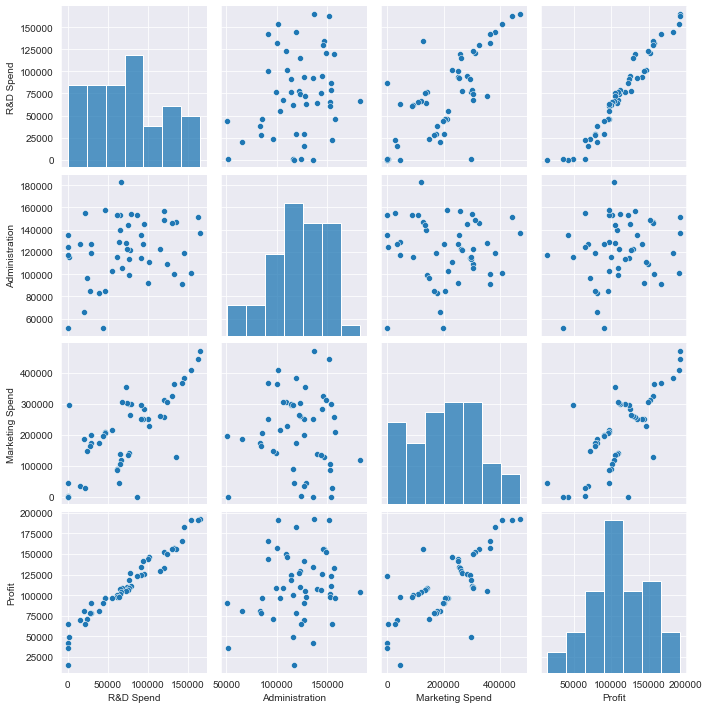

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(profit)

# Preparing a model

In [10]:
profit_rename = profit.rename(columns = {"R&D Spend":"RD", "Administration":"Admin", "Marketing Spend":"Marketing", "Profit": "profit"}, inplace = True)

In [11]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('profit~RD+Marketing+Admin',data=profit).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           4.53e-30
Time:                        17:03:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Coefficients
model.params

Intercept    50122.192990
RD               0.805715
Marketing        0.027228
Admin           -0.026816
dtype: float64

In [14]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RD           17.846374
Marketing     1.655077
Admin        -0.525507
dtype: float64 
 Intercept    1.057379e-09
RD           2.634968e-22
Marketing    1.047168e-01
Admin        6.017551e-01
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

In [16]:
prd=smf.ols('profit~RD',data = profit).fit()  
#t and p-Values
print(prd.tvalues, '\n', prd.pvalues)  

Intercept    19.320288
RD           29.151139
dtype: float64 
 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [17]:
prd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           3.50e-32
Time:                        17:03:05   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
pmarket=smf.ols('profit~Marketing',data = profit).fit()  
#t and p-Values
print(pmarket.tvalues, '\n', pmarket.pvalues)  

Intercept    7.808356
Marketing    7.802657
dtype: float64 
 Intercept    4.294735e-10
Marketing    4.381073e-10
dtype: float64


In [19]:
pmarket.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           4.38e-10
Time:                        17:03:05   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
padmin=smf.ols('profit~Admin',data = profit).fit()  
#t and p-Values
print(padmin.tvalues, '\n', padmin.pvalues)  

Intercept    3.040044
Admin        1.419493
dtype: float64 
 Intercept    0.003824
Admin        0.162217
dtype: float64


In [21]:
padmin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 10 Apr 2022   Prob (F-statistic):              0.162
Time:                        17:03:05   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
prdm=smf.ols('profit~RD+Marketing',data = profit).fit()  
#t and p-Values
print(prdm.tvalues, '\n', prdm.pvalues)  

Intercept    17.463582
RD           19.265555
Marketing     1.927052
dtype: float64 
 Intercept    3.504062e-22
RD           6.040433e-24
Marketing    6.003040e-02
dtype: float64


In [23]:
prdm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           2.16e-31
Time:                        17:03:05   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
Marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [24]:
rsq_RD = smf.ols('RD~profit+Marketing+Admin',data=profit).fit().rsquared  
vif_RD = 1/(1-rsq_RD) 
rsq_RD

0.9488830971212534

In [25]:
vif_RD

19.563000566996017

In [26]:
rsq_market = smf.ols('Marketing~RD+profit+Admin',data=profit).fit().rsquared  
vif_market = 1/(1-rsq_market) 
rsq_market

0.5943750647160793

In [27]:
vif_market

2.4653316722258243

In [28]:
rsq_Admin = smf.ols('Admin~Marketing+RD+profit',data=profit).fit().rsquared  
vif_Admin = 1/(1-rsq_Admin) 
rsq_Admin

0.15408049296399062

In [29]:
vif_Admin

1.1821455725780203

In [30]:
rsq_profit = smf.ols('profit~Marketing+RD+Admin',data=profit).fit().rsquared  
vif_profit = 1/(1-rsq_profit) 
rsq_profit

0.9507459940683246

In [31]:
vif_profit

20.30291711474573

In [32]:
# Storing vif values in a data frame
datset = {'Variables':['RD','Marketing','Admin','profit'],'VIF':[vif_RD,vif_market,vif_Admin,vif_profit]}
Vif_frame = pd.DataFrame(datset)  
Vif_frame

,Variables,VIF
0,RD,19.563001
1,Marketing,2.465332
2,Admin,1.182146
3,profit,20.302917


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

C:\Users\parth\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


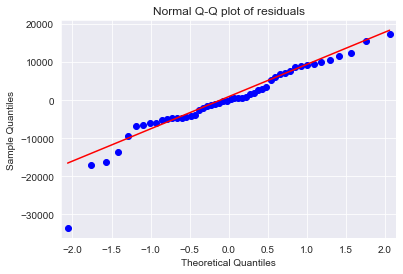

In [33]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [34]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# Residual Plot for Homoscedasticity

In [35]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

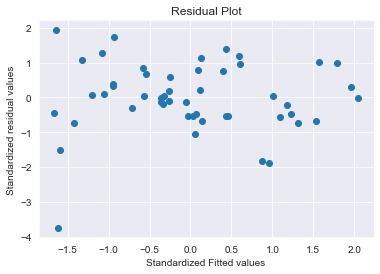

In [36]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

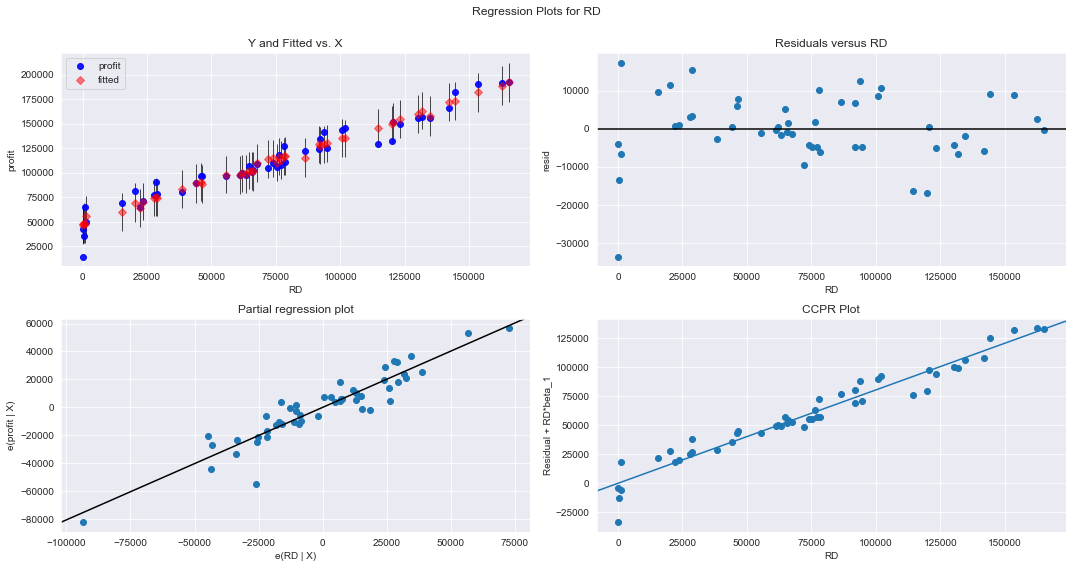

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

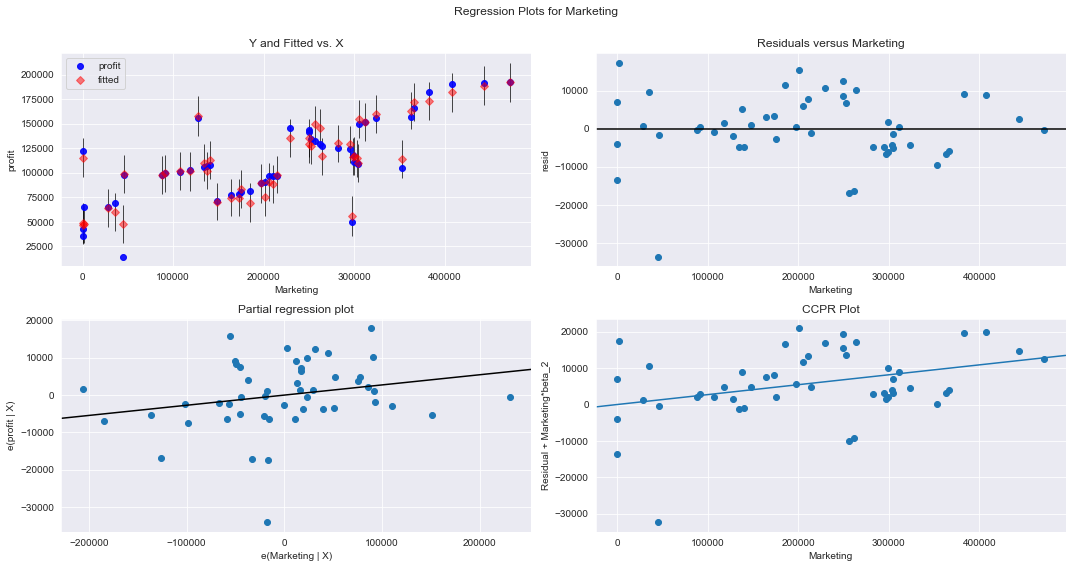

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

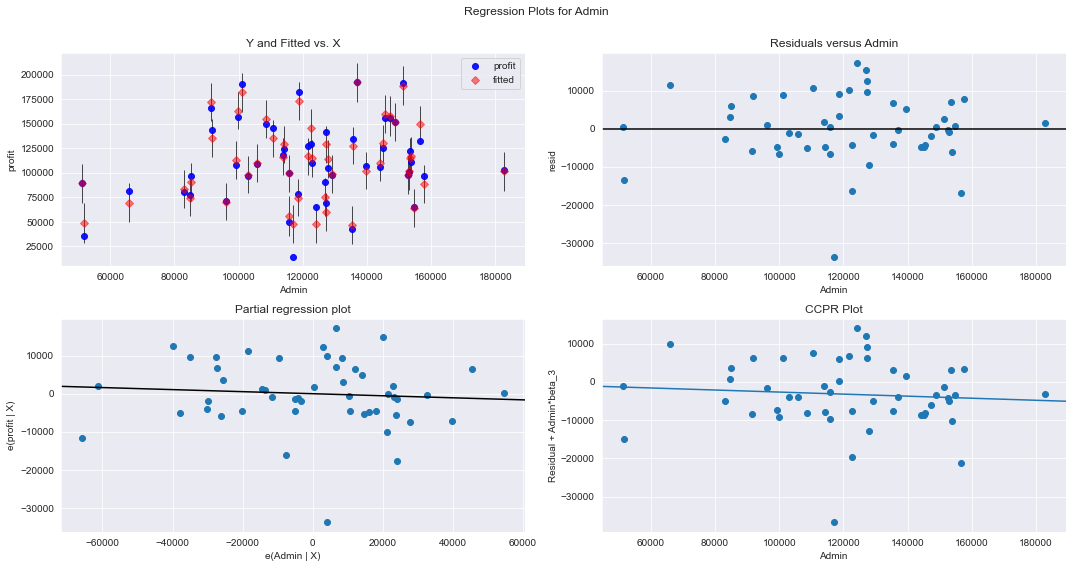

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers or Outliers

# Cook's Distance

In [40]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

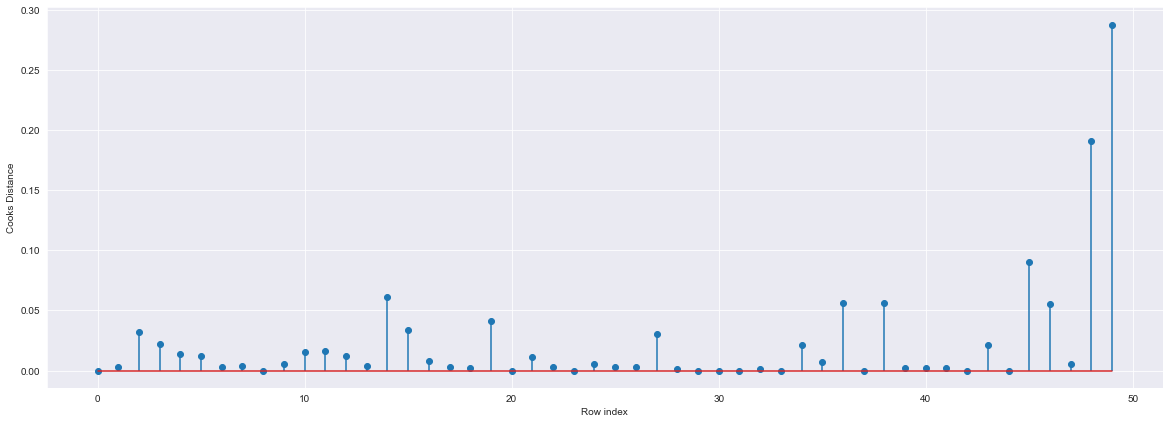

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(profit)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543268)

# High Influence Points

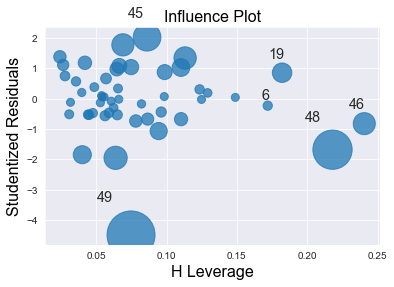

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
# From the above plot it is identified that 49 and 48 are the influencers/outliers
profit.shape

(50, 5)

In [45]:
k = profit.shape[1]  # number of columns
n = profit.shape[0]  # number of rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [46]:
# viewing the outliers/influencers 
profit[profit.index.isin([49, 48])]

,RD,Admin,Marketing,State,profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [47]:
# comparing the above influencers with the other data present
profit.head()

,RD,Admin,Marketing,State,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [48]:
# when compared we can oberve R&D spent is less which is affecting the profit in the given states

# Improving the model

In [49]:
profit_new = pd.read_csv("D:/Data Science/Assignments/multi linear regression/50_Startups.csv")
profit_new.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [50]:
#Discard the data points which are influencers and reasign the row number (reset_index())
impprofit= profit_new.drop(profit_new.index[[49,48]],axis=0).reset_index()

In [51]:
#Drop the original index
impprofit=impprofit.drop(['index'],axis=1)

In [52]:
impprofit

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Building The Model

In [53]:
impprofit_rename = impprofit.rename(columns = {"R&D Spend":"RD", "Administration":"Admin", "Marketing Spend":"Marketing", "Profit": "profit"}, inplace = True)

In [54]:
#Exclude variable "Marketing" and generate R-Squared and AIC values
final_ml= smf.ols('profit~RD+Admin',data = impprofit).fit()

In [55]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     559.7
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           1.62e-32
Time:                        17:03:10   Log-Likelihood:                -494.17
No. Observations:                  48   AIC:                             994.3
Df Residuals:                      45   BIC:                             1000.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.273e+04   5182.210     12.106      0.000    5.23e+04    7.32e+04
RD             0.8229      0.025     33.245      0.000       0.773       0.873
Admin         -0.0837      0.041     -2.041      0.047      -0.166      -0.001
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.396
Skew:                           0.073   Prob(JB):                        0.820
Kurtosis:                       2.580   Cond. No.                     7.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
(final_ml.rsquared,final_ml.aic)

(0.9613542664192156, 994.3402293693792)

In [57]:
#Exclude variable "RD" and generate R-Squared and AIC values
final_mlm= smf.ols('profit~Marketing+Admin',data = impprofit).fit()

In [58]:
final_mlm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     28.94
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           8.32e-09
Time:                        17:03:10   Log-Likelihood:                -552.41
No. Observations:                  48   AIC:                             1111.
Df Residuals:                      45   BIC:                             1116.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.755e+04   1.94e+04      1.419      0.163   -1.16e+04    6.67e+04
Marketing      0.2333      0.031      7.525      0.000       0.171       0.296
Admin          0.3013      0.137      2.193      0.033       0.025       0.578
==============================================================================
Omnibus:                        6.308   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.486
Skew:                          -0.457   Prob(JB):                       0.0391
Kurtosis:                       4.551   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
(final_mlm.rsquared,final_mlm.aic)

(0.5625802937857887, 1110.8101546830774)

Comparing above R-Square and AIC values, model 'final_ml' has high R- square and low AIC value hence include variable 'RD' so that multi collinearity problem would be resolved.

# Cook's Distance

In [60]:
model_influence_RD = final_ml.get_influence()
(c_RD, _) = model_influence_RD.cooks_distance

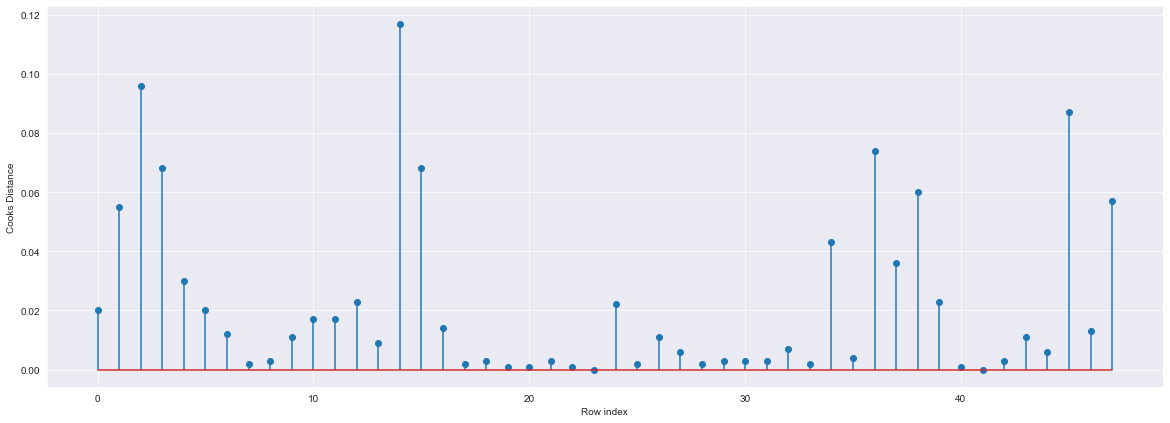

In [61]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(impprofit)),np.round(c_RD,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [62]:
#index of the data points where c is more than .1
(np.argmax(c_RD),np.max(c_RD))

(14, 0.11654464976722385)

In [63]:
#Drop 3,14 and 45 observations
profit1=impprofit.drop(impprofit.index[[3,14,45]],axis=0)

In [64]:
profit1

,RD,Admin,Marketing,State,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96
10,101913.08,110594.11,229160.95,Florida,146121.95


In [65]:
#Reset the index and re arrange the row values
profit1=profit1.reset_index()

In [66]:
profit1

,index,RD,Admin,Marketing,State,profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,4,142107.34,91391.77,366168.42,Florida,166187.94
4,5,131876.90,99814.71,362861.36,New York,156991.12
5,6,134615.46,147198.87,127716.82,California,156122.51
6,7,130298.13,145530.06,323876.68,Florida,155752.60
7,8,120542.52,148718.95,311613.29,New York,152211.77
8,9,123334.88,108679.17,304981.62,California,149759.96
9,10,101913.08,110594.11,229160.95,Florida,146121.95


In [67]:
#Build the model on the new data
final= smf.ols('profit~RD+Admin',data = profit1).fit()

In [68]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     590.9
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           1.77e-31
Time:                        17:03:10   Log-Likelihood:                -459.28
No. Observations:                  45   AIC:                             924.6
Df Residuals:                      42   BIC:                             930.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.01e+04   4838.241     12.421      0.000    5.03e+04    6.99e+04
RD             0.8313      0.024     34.145      0.000       0.782       0.880
Admin         -0.0687      0.038     -1.796      0.080      -0.146       0.009
==============================================================================
Omnibus:                        0.532   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.443
Skew:                           0.231   Prob(JB):                        0.801
Kurtosis:                       2.849   Cond. No.                     7.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#Again check for influencers
model_influence = final.get_influence()
(c_RD, _) = model_influence.cooks_distance

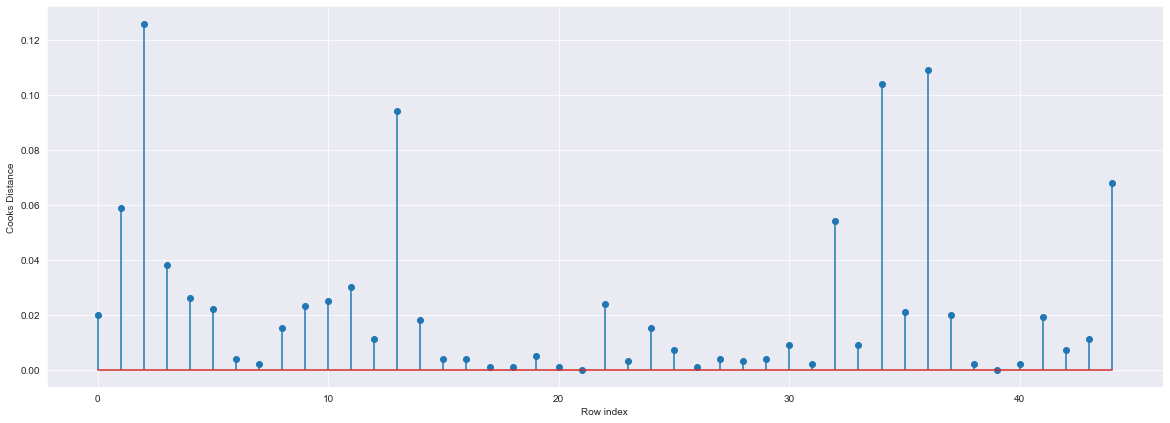

In [70]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(profit1)),np.round(c_RD,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [71]:
#index of the data points where c is more than .5
(np.argmax(c_RD),np.max(c_RD))

(2, 0.1262304690267566)

Since the value is <1 , we can stop the diagnostic process and finalize the model

In [72]:
final= smf.ols('profit~RD+Admin',data = profit1).fit()

In [73]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     590.9
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           1.77e-31
Time:                        17:03:11   Log-Likelihood:                -459.28
No. Observations:                  45   AIC:                             924.6
Df Residuals:                      42   BIC:                             930.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.01e+04   4838.241     12.421      0.000    5.03e+04    6.99e+04
RD             0.8313      0.024     34.145      0.000       0.782       0.880
Admin         -0.0687      0.038     -1.796      0.080      -0.146       0.009
==============================================================================
Omnibus:                        0.532   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.766   Jarque-Bera (JB):                0.443
Skew:                           0.231   Prob(JB):                        0.801
Kurtosis:                       2.849   Cond. No.                     7.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
#New data for prediction
new_data=pd.DataFrame({'RD':15000,"Admin": 90000,"Marketing":2500},index=[1])

In [75]:
final.predict(new_data)

1    66381.826099
dtype: float64

In [80]:
final.predict(profit.iloc[0:5,])

0    188151.819144
1    184869.504913
2    180708.845029
3    171965.102045
4    171956.382709
dtype: float64

In [81]:
pred_y = final.predict(profit)

In [82]:
pred_y

0     188151.819144
1     184869.504913
2     180708.845029
3     171965.102045
4     171956.382709
5     162872.630608
6     161893.689162
7     158419.153292
8     150089.766081
9     155162.204157
10    137221.705844
11    137481.841287
12    129380.712403
13    127263.304750
14    149053.684876
15    146879.371795
16    116596.545484
17    128820.263365
18    128525.884243
19    121392.433525
20    115665.123741
21    114698.716627
22    113174.308176
23    108972.326848
24    117324.172098
25    104265.726795
26    112816.461090
27    111256.435301
28    102457.888128
29    104121.734870
30    103688.759753
31    100429.049363
32    103931.670061
33     99149.166839
34     87856.705409
35     92505.484661
36     75195.110595
37     93209.139921
38     72381.975034
39     86449.280487
40     75855.114770
41     77463.711948
42     73140.156790
43     64233.829998
44     67896.364018
45     52396.613680
46     53231.479035
47     50790.479855
48     56990.787507
49     52057.654773
